In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display 

In [61]:
audio1_path = 'C:/Users/selen/Downloads/Audio/harvard.wav'
y, samplingRate = librosa.load(audio1_path, sr=None)
y, samplingRate

(array([ 0.0000000e+00,  1.5258789e-05, -3.0517578e-05, ...,
        -1.7395020e-03, -1.7547607e-03, -1.8463135e-03],
       shape=(809508,), dtype=float32),
 44100)

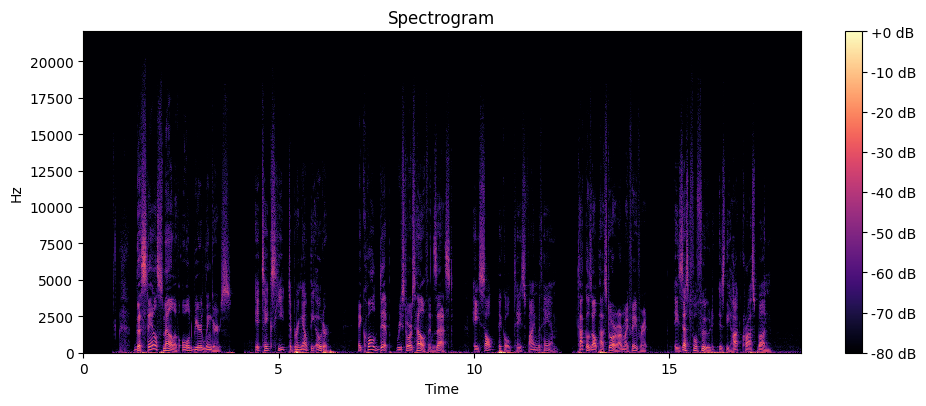

In [62]:
D = librosa.stft(y)
# compute the Short-Time Fourier Transform to get frequency content over time.
sr = 44100
# set the sampling rate to 44.1 kHz for audio processing.

S_db = librosa.amplitude_to_db(abs(D), ref=np.max)
# convert the STFT amplitude to decibels for better visualization.

plt.figure(figsize=(10,4))
# doing this to create a figure window with a specific size for the plot.
librosa.display.specshow(S_db, sr=sr, x_axis="time", y_axis="hz", cmap="magma")
# to display the spectrogram with time on x-axis, frequency on y-axis, and a color map.
plt.colorbar(format="%+2.0f dB")
# doing this to add a color bar showing decibel values.
plt.tight_layout()
plt.title("Spectrogram")
plt.show()

In [73]:
#samping parameters
sr=44100
low_cutoff=1000
high_cutoff=8000
hop_length=512
# doing this to set audio processing parameters like sampling rate and frame size.

y_resampled = librosa.resample(y, orig_sr = 44100, target_sr=sr)
# doing this to adjust audio to a 44.1 kHz sampling rate.

#Clean audio file
y_resampled = np.nan_to_num(y_resampled, nan= 0.0, posinf= 0.0, neginf=0.0)
y_normalized = y_resampled/np.max(np.abs(y_resampled))
# doing this to fix invalid audio values and scale amplitude for analysis.

#Extracting features
#1. Root mean square energy over time
rms = librosa.feature.rms(y=y_normalized)
timestamps = librosa.frames_to_time(np.arange(rms.shape[1]), sr=sr, hop_length=hop_length)
# doing this to measure audio loudness and get time points for features.

#2. Spectral Centroid 
spec_centroid = librosa.feature.spectral_centroid(y=y_normalized, sr=sr, n_fft=2048, hop_length=hop_length)
# doing this to find the frequency center to show audio brightness.

#3. MFCC
mfcc = librosa.feature.mfcc(y=y_normalized, sr=sr)
# doing this to capture audio timbre for speech or music analysis.

#Load the deatures into a Dataframe
features = pd.DataFrame(
    {
        "timestamp": timestamps,
        "rms": rms[0], 
        "spec_centroid": spec_centroid[0],
        "label": "man"
    }
)
features

,timestamp,rms,spec_centroid,label
0,0.000000,0.000008,10890.945206,man
1,0.011610,0.000010,11056.848464,man
2,0.023220,0.000011,11255.494375,man
3,0.034830,0.000011,11008.699846,man
4,0.046440,0.000011,11016.209905,man
...,...,...,...,...
1577,18.308934,0.000841,3969.934375,man
1578,18.320544,0.000700,4429.830694,man
1579,18.332154,0.000767,4429.627135,man
1580,18.343764,0.000680,3954.675779,man


In [66]:
rms

array([[8.12024427e-06, 9.78388016e-06, 1.11471845e-05, ...,
        7.67160614e-04, 6.79927471e-04, 6.29916787e-04]],
      shape=(1, 1582), dtype=float32)

In [68]:
timestamps

array([0.00000000e+00, 1.16099773e-02, 2.32199546e-02, ...,
       1.83321542e+01, 1.83437642e+01, 1.83553741e+01], shape=(1582,))

In [69]:
spec_centroid

array([[10890.94520619, 11056.8484644 , 11255.49437505, ...,
         4429.62713546,  3954.67577901,  3814.59417763]], shape=(1, 1582))